In [1]:
import pandas as pd
from importlib import reload
import numpy as np

import feature_extraction
import hp_tuning as tune

In [2]:
train = pd.read_csv("C:\\Users\\adelu\\Documents\\UZH\\Thesis\\code\\general_identification\\by_date\\datasets\\training_b.csv")
test = pd.read_csv("C:\\Users\\adelu\\Documents\\UZH\\Thesis\\code\\general_identification\\by_date\\datasets\\testing_b.csv")

In [3]:
# sort the dataframes
train = train.sample(frac=1)
test = test.sample(frac=1)

In [4]:
new_train = pd.DataFrame(columns=train.columns)
new_test = pd.DataFrame(columns=test.columns)

np.random.seed(123)
# select a subset of rows
for i in train["Code"].unique():
    tmp_df = train.loc[train["Code"] == i]

    # random set of 100 rows
    rd = np.random.choice(a=np.arange(0, tmp_df.shape[0], 1), size=100, replace=False)

    new_train = new_train.append(tmp_df.iloc[rd], ignore_index=True).copy(deep=True)

    tmp_df = test.loc[test["Code"] == i]

    # random set of 100 rows
    rd = np.random.choice(a=np.arange(0, tmp_df.shape[0], 1), size=25, replace=False)

    new_test = new_test.append(tmp_df.iloc[rd], ignore_index=True).copy(deep=True)

new_train = new_train.sample(frac=1)
new_test.sample(frac=1)

GroupName Sex AgeDays  AgeYears     RecDate  \
499   Rascals   F     337  0.923288  09/09/2014   
342     Zulus   M     546  1.495890  10/06/2015   
91    Rascals   M     465  1.273973  06/08/2016   
188    Baobab   M     550  1.506849  22/07/2016   
331     Zulus   M     365  1.000000  11/12/2014   
..        ...  ..     ...       ...         ...   
88    Rascals   M     465  1.273973  06/08/2016   
348     Zulus   M     546  1.495890  10/06/2015   
463     Zulus   M     462  1.265753  09/06/2015   
477   Rascals   F     337  0.923288  09/09/2014   
148    Baobab   M    1329  3.641096  17/09/2014   

                         SourceFile     Code    ID  \
499  VRRF159_RR_2_AM_09SEPT2014.WAV  VRRF159  2886   
342   VZUM011_ZU_1_AM_10JUN2015.WAV  VZUM011  2925   
91       VRRM182_RR_1_06AUG2016.WAV  VRRM182  3243   
188   VVHM089_BB_2_AM_22JUL2016.WAV  VVHM089  3188   
331   VZUM011_ZU_1_AM_11DEC2014.WAV  VZUM011  2925   
..                              ...      ...   ...   
88       VRRM182_RR_1_06AUG2016.WAV  VRRM182  3243   
348   VZUM011_ZU_1_AM_10JUN2015.WAV  VZUM011  2925   
463   VZUM016_ZU_1_AM_09Jun2015.WAV  VZUM016  2999   
477  VRRF159_RR_2_AM_09SEPT2014.WAV  VRRF159  2886   
148  VBBM071_BB_2_AM_17SEPT2014.WAV  VBBM071  2392   

                                        CallFile CallTime CallType  \
499         VRRF159_RR_2_AM_09SEPT2014_AD_17.WAV  03:25.0       SC   
342          VZUM011_ZU_1_AM_10JUN2015_AD_11.WAV  03:16.8       SC   
91              VRRM182_RR_1_06AUG2016_AD_19.WAV  01:31.4       SC   
188   VVHM089_BB_2_AM_22JUL2016_AD_08_aug_01.WAV  05:23.0       SC   
331          VZUM011_ZU_1_AM_11DEC2014_AD_10.WAV  05:29.7       SC   
..                                           ...      ...      ...   
88              VRRM182_RR_1_06AUG2016_AD_20.WAV  01:37.7       SC   
348          VZUM011_ZU_1_AM_10JUN2015_AD_12.WAV  03:32.9       FO   
463   VZUM016_ZU_1_AM_09Jun2015_AD_06_aug_02.WAV  01:33.4       SC   
477  VRRF159_RR_2_AM_09SEPT2014_AD_13_aug_04.WAV  03:03.1       SC   
148         VBBM071_BB_2_AM_17SEPT2014_AD_12.WAV  10:08.4       SC   

                                                  Path  
499  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
342  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
91   C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
188  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
331  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
..                                                 ...  
88   C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
348  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
463  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
477  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  
148  C:\Users\adelu\Documents\UZH\Thesis\audio\raw_...  

[500 rows x 12 columns]

In [5]:
# load the audio signals
train_sig, train_sr = feature_extraction.audio(new_train["Path"].to_list())
test_sig, test_sr = feature_extraction.audio(new_test["Path"].to_list())

In [6]:
# feature extraction (MFCCs)
X_train, train_specs = feature_extraction.features(
    signals=train_sig, sample_rates=train_sr
    )
X_test, test_specs = feature_extraction.features(
    signals=test_sig, sample_rates=test_sr
)

In [7]:
reload(feature_extraction)

# create the spectrogram images
Xspecs_train = feature_extraction.spec_img(
    specs_dB=train_specs, metadata_df=new_train, sample_rates=train_sr,
    directory="C:\\Users\\adelu\\Documents\\UZH\\Thesis\\spectrograms\\general_identification\\by_date\\train\\"
)
Xspecs_test = feature_extraction.spec_img(
    specs_dB=test_specs, metadata_df=new_test, sample_rates=test_sr,
    directory="C:\\Users\\adelu\\Documents\\UZH\\Thesis\\spectrograms\\general_identification\\by_date\\test\\"
)

In [8]:
Xspecs_train.shape

(2000, 108, 223, 3)

In [9]:
# define the targets
y_train, individuals_train = feature_extraction.get_targets(
    metadata_df=new_train, show_distribution=True
    )
y_test, individuals_test = feature_extraction.get_targets(
    metadata_df=new_test, show_distribution=False
    )

Indiviudals distribution: 
   individual    n
0     VBBF083  100
1     VBBF088  100
2     VBBF093  100
3     VBBM071  100
4     VBBM090  100
5     VRRF159  100
6     VRRF180  100
7     VRRM181  100
8     VRRM182  100
9     VRRM183  100
10    VUKF016  100
11    VUKF018  100
12    VUKM004  100
13    VUKM017  100
14    VVHM089  100
15     VWM132  100
16    VZUF009  100
17    VZUF014  100
18    VZUM011  100
19    VZUM016  100


In [10]:
# get one-hot encoded targets
y_train_onehot = feature_extraction.one_hot(y_train)
y_train_onehot.shape

(2000, 20)

In [11]:
# flatten
flat_X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
flat_X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

In [16]:
reload(tune)

# tune the random forest
best_params, best_score = tune.RFtuning(X=flat_X_train, y=y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
RF - Best Params: 
{'n_estimators': 320, 'min_samples_split': 7, 'max_leaf_nodes': 35, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'gini'}
RF - Best Score:  0.253


INFO:tensorflow:Oracle triggered exit
Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 3.4733 - accuracy: 0.0625 - val_loss: 3.0033 - val_accuracy: 0.0900
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 2.7190 - accuracy: 0.2742 - val_loss: 2.9918 - val_accuracy: 0.1187
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 2.1433 - accuracy: 0.5575 - val_loss: 3.0761 - val_accuracy: 0.1275
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 1.3563 - accuracy: 0.8217 - val_loss: 3.3877 - val_accuracy: 0.1338
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.7765 - accuracy: 0.9700 - val_loss: 3.4520 - val_accuracy: 0.1462
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.9975 - val_loss: 3.4149 - val_accuracy: 0.1412
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 1.0000 - val_loss

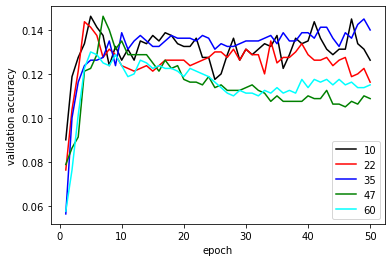

best epochs: [5, 4, 49, 7, 5]
BEST MODEL:
best number of units input: 128
best number of units hidden: 544
best activation input: relu
best activation hidden: sigmoid
best activation outputs: softmax
best learning rate: 0.001


In [16]:
reload(tune)

best_params, best_score = tune.ANNtuning(X=flat_X_train, y=y_train_onehot, input_shape=X_train.shape[1:])

INFO:tensorflow:Oracle triggered exit
Epoch 1/50
100/100 [==============================] - 681s 7s/step - loss: 1271.4424 - accuracy: 0.0500 - val_loss: 147.7680 - val_accuracy: 0.0500
Epoch 2/50
100/100 [==============================] - 678s 7s/step - loss: 92.4859 - accuracy: 0.1213 - val_loss: 56.3379 - val_accuracy: 0.1275
Epoch 3/50
100/100 [==============================] - 680s 7s/step - loss: 43.4891 - accuracy: 0.1550 - val_loss: 31.6741 - val_accuracy: 0.1750
Epoch 4/50
100/100 [==============================] - 680s 7s/step - loss: 26.6976 - accuracy: 0.2262 - val_loss: 21.0258 - val_accuracy: 0.2175
Epoch 5/50
100/100 [==============================] - 677s 7s/step - loss: 18.5778 - accuracy: 0.3225 - val_loss: 15.3387 - val_accuracy: 0.3250
Epoch 6/50
100/100 [==============================] - 677s 7s/step - loss: 13.9438 - accuracy: 0.4025 - val_loss: 11.9035 - val_accuracy: 0.3900
Epoch 7/50
100/100 [==============================] - 678s 7s/step - loss: 11.0169 - accu

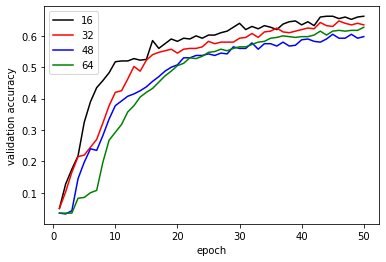

best epochs: [44, 46, 45, 50]
BEST MODEL:
best filters(1): 512
best activation(1): tanh
best filters(2): 352
best activation(2): sigmoid
best filters(3): 256
best activation(3): relu
best units(4): 32
best activation(4): relu
best activation(5): softmax
best learning rate: 0.0001


In [13]:
reload(tune)

best_params, best_score = tune.CNNtuning(imgs=Xspecs_train, y=y_train_onehot)